In [1]:
import pandas as pd
import matplotlib.pyplot as plot

In [2]:
%matplotlib inline

In [3]:
df= pd.read_csv("letterCG.data",delimiter=' ')

In [4]:
df.head()

,Class,x-box,y-box,width,high,Unnamed: 5,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,Unnamed: 18
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9,NaN,NaN
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7,NaN,NaN
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10,NaN,NaN
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7,NaN,NaN
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9,NaN,NaN


In [5]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, 1:-2].values,df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
print(X_train.shape,X_test.shape)

(1207, 16) (302, 16)


In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [8]:
n_estimators = [1,2,4,8,10,16]
scores ={}

In [9]:
for num in n_estimators:
    clf= AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=num,learning_rate=1.5)
    clf = clf.fit(X_train,y_train)
    scores[num]=  clf.score(X_test,y_test)

In [10]:
scores

{1: 0.7880794701986755,
 2: 0.8112582781456954,
 4: 0.8807947019867549,
 8: 0.8675496688741722,
 10: 0.9039735099337748,
 16: 0.9470198675496688}

Text(0, 0.5, 'Accuracy')

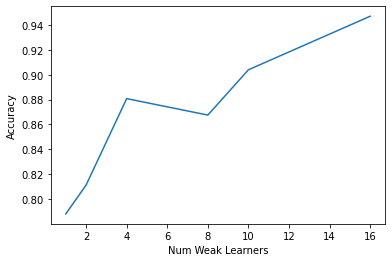

In [11]:
plot.plot(scores.keys(),scores.values())
plot.xlabel("Num Weak Learners")
plot.ylabel("Accuracy")

In [12]:
n_estimators = [1,2,4,8,10,16,32]
scores ={}

for num in n_estimators:
    clf= AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=num,learning_rate=1.5)
    clf = clf.fit(X_train,y_train)
    scores[num]=  clf.score(X_test,y_test)

In [13]:
scores

{1: 0.890728476821192,
 2: 0.9437086092715232,
 4: 0.9470198675496688,
 8: 0.9768211920529801,
 10: 0.9801324503311258,
 16: 0.9635761589403974,
 32: 0.9735099337748344}